In [12]:
import requests
import time
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
from io import BytesIO

In [14]:
subscription_key = "e400e3bf0a09443d880e5bf0e1895eb8"#key1
vision_base_url = "https://southeastasia.api.cognitive.microsoft.com/vision/v2.0/"
text_recognition_url = vision_base_url + "read/core/asyncBatchAnalyze"

In [19]:
text_recongnition_url = vision_base_url + 'read/core/asyncBatchAnalyze'#read/core/asyncBatchAnalyze 功能名稱
image_url = "https://i.imgur.com/VYLTAUV.jpg"#要運算的圖片
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params  = {'mode': 'Handwritten'}
data    = {'url': image_url}
response = requests.post(text_recognition_url, headers=headers, params=params, json=data)

In [6]:
#此辨識花費時間較長，需每隔一秒檢查傳回判斷是否辨識完成

In [20]:
analysis = {}#變數儲存傳回值
flag = True #紀錄是否辨識完成,False為辨識完成
while (flag):
    response_final = requests.get(response.headers["Operation-Location"], headers=headers)
    analysis = response_final.json()#取得回傳值
    print(analysis)
    if ("recognitionResults" in analysis): flag= False  #回傳值有「recognitionResults」表示完成
    if ("status" in analysis and analysis['status'] == 'Failed'): flag= False  #辨識失敗
    time.sleep(1)  #辨識需時間,每1秒讀一次回傳值

{'status': 'Succeeded', 'recognitionResults': [{'page': 1, 'clockwiseOrientation': 359.95, 'width': 600, 'height': 376, 'unit': 'pixel', 'lines': [{'boundingBox': [0, 3, 595, 8, 594, 112, 0, 107], 'text': 'Penultimate', 'words': [{'boundingBox': [10, 11, 594, 9, 594, 110, 5, 95], 'text': 'Penultimate'}]}, {'boundingBox': [2, 122, 593, 121, 594, 162, 3, 163], 'text': 'The spirit is willing but the flesh is weak', 'words': [{'boundingBox': [4, 123, 60, 123, 59, 159, 3, 157], 'text': 'The'}, {'boundingBox': [66, 123, 142, 123, 142, 161, 66, 159], 'text': 'spirit'}, {'boundingBox': [149, 123, 176, 123, 175, 162, 149, 162], 'text': 'is'}, {'boundingBox': [182, 123, 283, 122, 283, 163, 182, 162], 'text': 'willing'}, {'boundingBox': [290, 122, 341, 122, 341, 163, 289, 163], 'text': 'but'}, {'boundingBox': [348, 122, 401, 122, 401, 163, 347, 163], 'text': 'the'}, {'boundingBox': [408, 122, 489, 123, 488, 161, 408, 163], 'text': 'flesh'}, {'boundingBox': [495, 123, 522, 123, 522, 160, 495, 161]

In [ ]:
#取得每列文字座標。辨識手寫文字功能座標回傳值與辨識印刷體文字不同，此處傳回多邊形

In [22]:
polygons = []#取得每列座標
if ('recognitionResults' in analysis):
    polygons = []
    for line in analysis['recognitionResults'][0]['lines']:
        polygons.append((line['boundingBox'],line['text']))
polygons

[([0, 3, 595, 8, 594, 112, 0, 107], 'Penultimate'),
 ([2, 122, 593, 121, 594, 162, 3, 163],
  'The spirit is willing but the flesh is weak'),
 ([2, 194, 592, 193, 593, 262, 3, 264], 'SCHADENFREUDE'),
 ([1, 281, 599, 281, 599, 314, 2, 315], '3964 Elm Street and 1370 Rt. 21'),
 ([0, 336, 597, 338, 596, 367, 0, 364],
  'The left hand does not know what the right hand is doing .')]

In [ ]:
#框選及列印文字

(-0.5, 599.5, 375.5, -0.5)

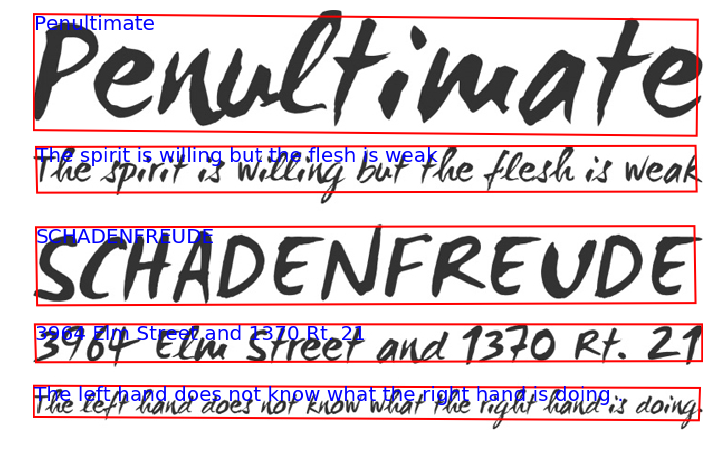

In [29]:
plt.figure(figsize = (12,12))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image)
for polygon in polygons:
    vertices = []
    for i in range(0,len(polygon[0]),2):
        vertices.append((polygon[0][i], polygon[0][i+1]))
    text = polygon[1]#取得文字
    patch = Polygon(vertices, closed=True, fill=False, linewidth=2, color='r')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0],vertices[0][1],text,fontsize = 20,va = 'top',color = 'b')#列印文字
plt.axis('off')